In [22]:
#import xmltodict, json
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Convert dataset

In [4]:
o = xmltodict.parse(open("all.xml",'r',encoding='utf-8').read())
a  = json.dumps(o, indent=2,ensure_ascii=False) # '{"e": {"a": ["text", "text"]}}'

In [6]:
with open("all.json", 'w', encoding='utf-8') as fd:
    fd.write(a)

## Filter dataset

In [23]:
import json

In [24]:
with open("../data/all.json", 'r', encoding='utf-8') as fd:
    data = json.loads(fd.read())

In [28]:
BASE_MODEL = "ai-forever/ruGPT-3.5-13B"

In [29]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

tokenizer_config.json: 100%|██████████| 933/933 [00:00<00:00, 51.6kB/s]
vocab.json: 100%|██████████| 1.77M/1.77M [00:00<00:00, 2.79MB/s]
merges.txt: 100%|██████████| 1.23M/1.23M [00:00<00:00, 2.50MB/s]
special_tokens_map.json: 100%|██████████| 582/582 [00:00<00:00, 69.1kB/s]


In [31]:
text_lens, title_lens, author_lens = [], [], []
selected_item_ids = []
text_char_lens = []

no_title_ids = []

for i, item in tqdm(enumerate(data['items']['item'])):
    encoded_t = tokenizer.encode(item['text'])
    if len(encoded_t) >= 500:
        continue

    if item['name'] is not None and item['author'] is not None:
        selected_item_ids.append(i)

        author_lens.append(len(tokenizer.encode(item['author'])))
        title_lens.append(len(tokenizer.encode(item['name'])))
        text_lens.append(len(encoded_t))
        
        text_char_lens.append(len(item['text']))
    else:
        no_title_ids.append(i)

print(len(no_title_ids), len(text_lens))

16694it [00:59, 282.07it/s]

505 14846


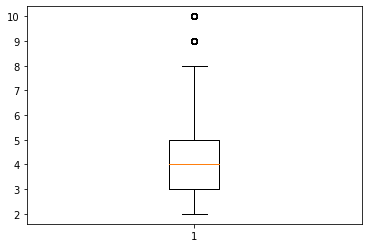

In [32]:
plt.boxplot(author_lens)
plt.show()

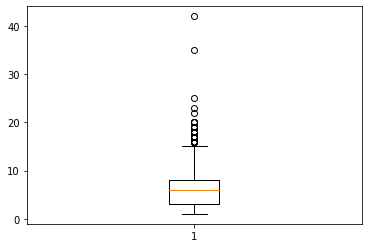

In [33]:
plt.boxplot(title_lens)
plt.show()

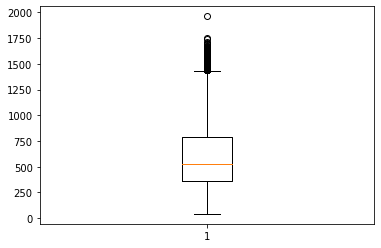

In [34]:
plt.boxplot(text_char_lens)
plt.show()

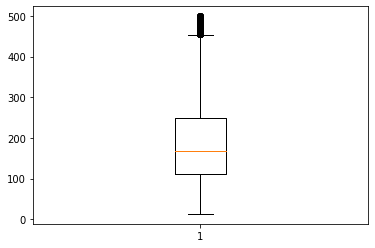

In [35]:
plt.boxplot(text_lens)
plt.show()

In [36]:
df = pd.DataFrame([[data['items']['item'][i]['text'],data['items']['item'][i]['name'],data['items']['item'][i]['author']] for i in selected_item_ids], columns=['text','title', 'author'])

In [37]:
df.to_csv("rupoems_dataset.csv", index=False, sep=';')

In [38]:
df

,text,title,author
0,"Забывши волнения жизни мятежной,\nОдин жил в п...",Забывши волнения жизни мятежной...,Михаил Лермонтов
1,"Нивы сжаты, рощи голы,\nОт воды туман и сырост...","Нивы сжаты, рощи голы...",Сергей Есенин
2,Лючинь печальная читала вечером ручьисто-вкрад...,ЧАРЫ ЛЮЧИНЬ,Игорь Северянин
3,"Глыбу кварца разбили молотом,\nИ, веселым огне...",Золото,Анатолий Жигулин
4,"Хлынул дождь, когда девушки, встав в хоровод,\...",Хоровод в Сульдуси,Николай Тихонов
...,...,...,...
14841,Седо\nКурчавятся облака\nНад чернотою полей.\n...,Ноябрь,Леонид Мартынов
14842,"Белокурая Параша,\nСребророзова лицом,\nКоей м...",Параше,Гаврила Державин
14843,"Сладкозвучная богиня,\nРифма золотая,\nСлух ча...",Рифма,Федор Сологуб
14844,Я так любил тебя — до грубых шуток\nИ до таких...,Я так любил тебя — до грубых шуток...,Илья Эренбург


# Train/test split

In [39]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [40]:
BASE_DATASET = "../data/rupoems_dataset.csv"

In [41]:
df = pd.read_csv(BASE_DATASET, sep=';')
print(df.shape)

(14846, 3)


In [42]:
filtered_df =df.drop_duplicates(subset=['text']).reset_index(drop=True)
print(filtered_df.shape[0])

14778


In [43]:
X_train, X_test = train_test_split(filtered_df, test_size=0.15)

In [44]:
X_train.to_csv("train_part.csv", sep=';', index=False)

In [45]:
X_test.to_csv("test_part.csv", sep=';', index=False)